# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<center><img src='assets/fashion-mnist-sprite.png' width=500px></center>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's import our resources and download the Fashion-MNIST dataset from `tensorflow_datasets`. 

## Import Resources

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar() 

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.3.1
	• tf.keras version: 2.4.0
	• GPU device not found. Running on CPU


## Load the Dataset

We are now going to load the Fashion-MNIST dataset using `tensorflow_datasets` as we've done before. In this case, however, we are going to omit the `split` argument.  This means that `tensorflow_datasets` will use the default value for `split` which is `split=None`. When `split=None`, `tensorflow_datasets` returns a **dictionary** with all the splits available for the dataset you are loading. However, if the split is given explicitly, such as `split='train'`, then `tensorflow_datasets` returns a `tf.data.Dataset` object.

In our case, we are going to load the `fashion_mnist` dataset. If we look at the [documentation](https://www.tensorflow.org/datasets/catalog/fashion_mnist#statistics) we will see that this particular dataset has 2 splits, namely a `train` and a `test` slipt. We also see that the `train` split has 60,000 examples, and that the `test` split has 10,000 examples. 

Now, let's load the `fashion_mnist` dataset and inspect the returned values.

In [6]:
dataset, dataset_info = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

Shuffling and writing examples to C:\/Users/ongch/tensorflow_datasets/fashion_mnist/3.0.1.incomplete75461H/fashion_mnist-train.tfrecord
Shuffling and writing examples to C:\/Users/ongch/tensorflow_datasets/fashion_mnist/3.0.1.incomplete75461H/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to C:\Users\ongch\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [7]:
print('Dataset has type:', type(dataset))
print('\nThe keys of dataset are:', list(dataset.keys()))

Dataset has type: <class 'dict'>

The keys of dataset are: [Split('test'), Split('train')]


In [8]:
training_set, test_set = dataset['train'], dataset['test']

In [9]:
dataset_info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [10]:
dataset_info.features['image']

Image(shape=(28, 28, 1), dtype=tf.uint8)

In [11]:
dataset_info.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=10)

In [12]:
dataset_info.splits['train']

<tfds.core.SplitInfo num_examples=60000>

In [14]:
shape_images = dataset_info.features['image'].shape
num_classes = dataset_info.features['label'].num_classes

num_training_examples = dataset_info.splits['train'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

print('There are {:,} classes in the dataset.'.format(num_classes))
print('The images have shape {}'.format(shape_images))

print('\nThere are {:,} of examples in our training set.'.format(num_training_examples))
print('There are {:,} of examples in our test set.'.format(num_test_examples))

There are 10 classes in the dataset.
The images have shape (28, 28, 1)

There are 60,000 of examples in our training set.
There are 10,000 of examples in our test set.


## Explore the Dataset

The images in this dataset are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, we create them here to use later when plotting the images:

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [17]:
for image, label in training_set.take(1):
    print('The images in the training set have:\n\u2022 dtype: {}\n\u2022 shape: {}'.format(image.dtype, image.shape))

The images in the training set have:
• dtype: <dtype: 'uint8'>
• shape: (28, 28, 1)


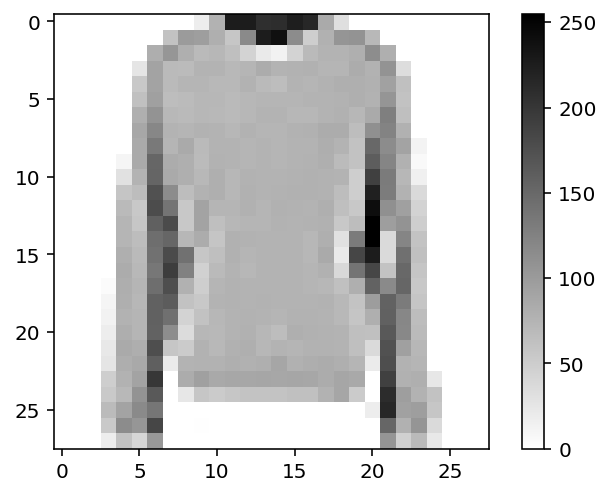

The label of this image is: 2
The class name of this label is: Pullover


In [20]:
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is:', label)
print('The class name of this label is:', class_names[label])

## Create Pipeline

In [21]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples // 4).batch(batch_size).map(normalize).prefetch(1)
testing_batches = test_set.cache().batch(batch_size).map(normalize).prefetch(1)

## Build the Model

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1), name='input'),
    tf.keras.layers.Dense(256, activation='relu', name='h1'),
    tf.keras.layers.Dense(128, activation='relu', name='h2'),
    tf.keras.layers.Dense(64, activation='relu', name='h3'),
    tf.keras.layers.Dense(32, activation='relu', name='h4'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 256)               200960    
_________________________________________________________________
h2 (Dense)                   (None, 128)               32896     
_________________________________________________________________
h3 (Dense)                   (None, 64)                8256      
_________________________________________________________________
h4 (Dense)                   (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
__________________________________________________

## Train the Model

In [31]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [32]:
EPOCHS = 20

model.fit(training_batches, epochs=EPOCHS)

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5222 - accuracy: 0.8177
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3724 - accuracy: 0.8654
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3344 - accuracy: 0.8770
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3143 - accuracy: 0.8842
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2941 - accuracy: 0.8911
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2818 - accuracy: 0.8961
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2634 - accuracy: 0.9011
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2536 - accuracy: 0.9052
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2457 - accuracy: 0.9086
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2362 - accuracy: 0.9112

## Evalute Loss and Accuracy on Test Set 

In [34]:
loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on TEST set: {:,.3f}'.format(loss))
print('Accuracy on TEST set: {:,.3%}'.format(accuracy))

157/157 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8865

Loss on TEST set: 0.370
Accuracy on TEST set: 88.650%


## Check Predictions

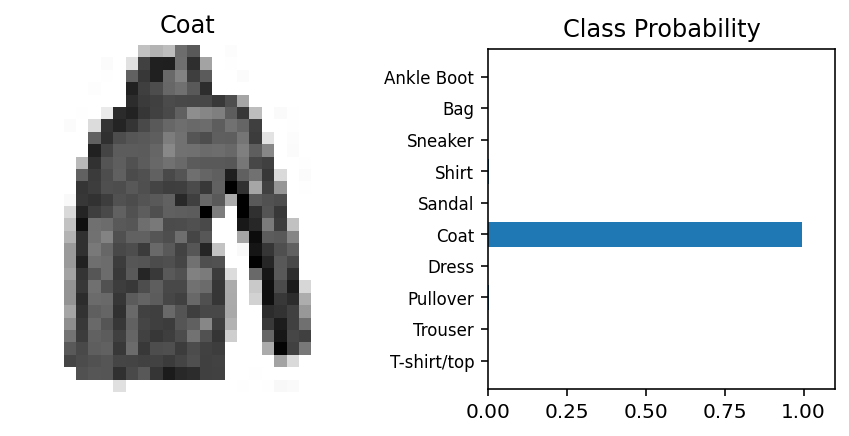

In [47]:
sample_number = 35

for image_batch, label_batch in testing_batches.take(1):
    ps = model.predict(image_batch)
    image = image_batch.numpy().squeeze()[sample_number]
    label = label_batch.numpy()[sample_number]

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(image, cmap=plt.cm.binary)
ax1.axis('off')
ax1.set_title(class_names[label])
ax2.barh(np.arange(10), ps[sample_number])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(class_names, size='small')
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()